### Notebook for plotting results for the manuscript

April 11, 2015

In [1]:
import pihm_methods as pm
reload(pm)
import pandas as pd
%pylab inline
plt.style.use('ggplot')

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load in the results from scenario 1
sc1 = pd.read_pickle("../results/scenario1_analysis_results2.pkl")

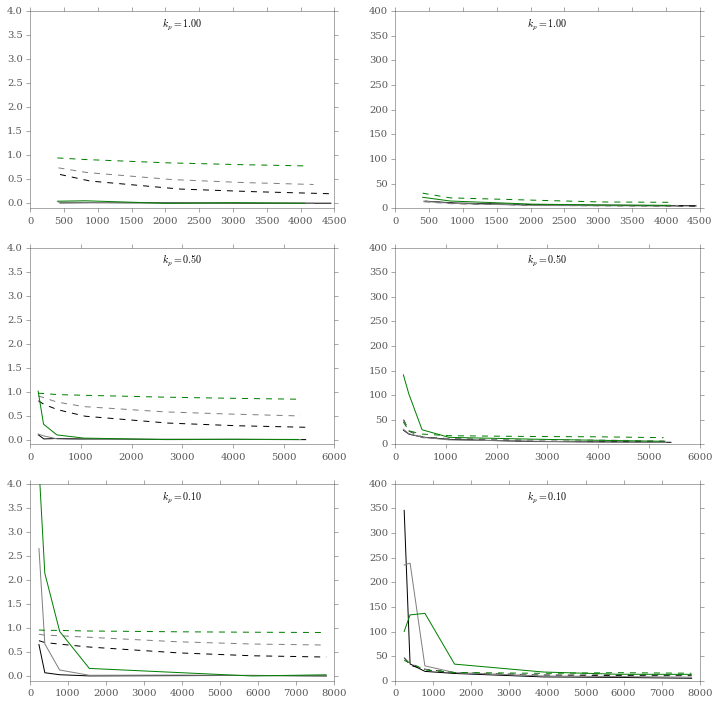

In [4]:
param = "a"

mup = 500
ks = [1, 0.5, .1]
#ld50s = [(5, -2.5), (10, -5), (20, -10)]
#ld50s = [(5, -1.15), (10, -2.3), (20, -4.6)]
#ld50s = [(5, -0.75), (25, -3.75), (50, -7.5)]
ld50s = [(10, -1.8), (20, -3.6), (60, -10.8)]
colors = ["black", "grey", "green"]
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
bias_ax = axes[:, 0]
prec_ax = axes[:, 1]

for i, k in enumerate(ks):
    
    bias_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                transform = bias_ax[i].transAxes)
    
    prec_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                transform = prec_ax[i].transAxes)
    for j, ld50 in enumerate(ld50s):
        
        try:
            samp_adj, bias_adj, prec_adj = pm.extract_simulation_results(sc1, [mup, ld50, k], "adjei", param) 
        except:
            print([mup, ld50, k])
        
        try:
            samp_like, bias_like, prec_like = pm.extract_simulation_results(sc1, [mup, ld50, k], "likelihood", param)
        except:
            print([mup, ld50, k])
            
        like_res = pd.DataFrame(zip(samp_like, bias_like, prec_like), columns=["N", "b", "p"])
        like_res.sort("N", inplace=True)
        
        adj_res = pd.DataFrame(zip(samp_adj, bias_adj, prec_adj), columns=["N", "b", "p"])
        adj_res.sort("N", inplace=True)
        
        bias_ax[i].plot(like_res.N, like_res.b, color=colors[j])
        bias_ax[i].plot(adj_res.N, adj_res.b, '--', color=colors[j])
        bias_ax[i].set_ylim(-0.1, 4)
        
        prec_ax[i].plot(like_res.N, like_res.p, color=colors[j])
        prec_ax[i].plot(adj_res.N, adj_res.p, '--', color=colors[j])
        prec_ax[i].set_ylim(0, 400)
    
    

In [81]:
samp, bias, prec = pm.extract_simulation_results(sc1, [10, (20, -10), .1], "adjei", "ld50")
samp1, bias1, prec1 = pm.extract_simulation_results(sc1, [10, (20, -10), .1], "likelihood", "ld50")

In [140]:

ps = []

for i in xrange(100):
    pihm = pm.PIHM()
    pihm.set_all_params(100, 10, 1, 20, -10)
    pihm.data = pihm.get_pihm_samples()[0]
    ps.append(pihm.test_for_pihm()[1])


Optimization terminated successfully.
         Current function value: 142.972466
         Iterations: 176
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 110.668059
         Iterations: 350
         Function evaluations: 600
Optimization terminated successfully.
         Current function value: 119.169752
         Iterations: 447
         Function evaluations: 796
Optimization terminated successfully.
         Current function value: 118.357775
         Iterations: 388
         Function evaluations: 704
Optimization terminated successfully.
         Current function value: 123.747223
         Iterations: 191
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 106.734615
         Iterations: 222
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 110.148588
         Iterations: 389
         Function evaluations: 701
Optimi

In [142]:
sum(np.array(ps) < 0.05)

65

In [23]:
pihm = pm.PIHM()

In [35]:
pihm.set_all_params(5000, 10, 1, 20, -10)

In [52]:
pihm.set_all_params(5000, 10, 1, 20, -10)
pihm.data = pihm.get_pihm_samples()[0]
print(pihm.likelihood_method(full_fit=False))
print(pihm.adjei_method([], [], no_bins=True, run_crof=False))

Optimization terminated successfully.
         Current function value: 5740.097505
         Iterations: 52
         Function evaluations: 99
(10, 1, 20.586229173384861, -10.328161899027679)
(5000, 10, 1, 10.954189702908637, -5.5866069937641107)
